In [6]:
from numpy import loadtxt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.image as mpimg
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [7]:
penguin_data = pd.read_csv('penguins_size.csv')
# Drop the rows with missing values
penguin_data = penguin_data.dropna()  
penguin_data.isna().sum() # Check for missing values
penguin_data = penguin_data[penguin_data['sex'] != '.']
# print(penguin_data.isna().sum())


In [8]:
# preprocessing the data
# Create separate LabelEncoders
label_encoder_species = LabelEncoder()
label_encoder_island = LabelEncoder()
label_encoder_sex = LabelEncoder()

# Fit and transform for each categorical column
penguin_data['species'] = label_encoder_species.fit_transform(penguin_data['species'])
penguin_data['island'] = label_encoder_island.fit_transform(penguin_data['island'])
penguin_data['sex'] = label_encoder_sex.fit_transform(penguin_data['sex'])

In [9]:
# Split the data into training and testing sets
# Assuming 'sex' is the target feature and the model is a binary classification
X = penguin_data.drop(columns=['sex']).values # Features: everything except 'sex'
Y = penguin_data['sex'].values # Target: 'sex'
print(np.unique(Y))
X_training, X_value, Y_training, Y_value = train_test_split(X, Y, test_size=0.15, random_state=42)

[0 1]


In [10]:
neural_network = Sequential()
neural_network.add(Dense(12, input_dim=X_training.shape[1], activation='relu')) # Here X_train.shape[1] will be 3 if you have 3 features.
neural_network.add(Dense(8, activation='relu'))
neural_network.add(Dense(1, activation='sigmoid')) # Binary classification
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = neural_network.fit(X_training, Y_training,  batch_size=10, validation_data=(X_value, Y_value), epochs=500)

Epoch 1/500
29/29 [==============================] - 1s 6ms/step - loss: 280.9855 - accuracy: 0.4770 - val_loss: 167.6939 - val_accuracy: 0.6000
Epoch 2/500
29/29 [==============================] - 0s 2ms/step - loss: 173.2140 - accuracy: 0.4770 - val_loss: 91.2411 - val_accuracy: 0.6000
Epoch 3/500
29/29 [==============================] - 0s 2ms/step - loss: 85.9968 - accuracy: 0.4770 - val_loss: 38.3958 - val_accuracy: 0.6000
Epoch 4/500
29/29 [==============================] - 0s 2ms/step - loss: 23.6307 - accuracy: 0.4770 - val_loss: 0.6211 - val_accuracy: 0.6400
Epoch 5/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6254 - val_loss: 0.5968 - val_accuracy: 0.6800
Epoch 6/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6042 - val_loss: 0.6940 - val_accuracy: 0.4400
Epoch 7/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6466 - val_loss: 0.6121 - val_accuracy: 0.6400
Epo

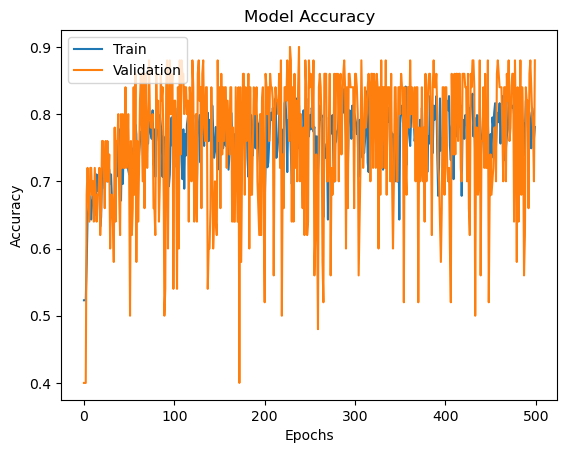

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_plot.png')